# 01 - Classificando patologias em toras usando combinação de `LBP + SVM`

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from zipfile import ZipFile
from skimage import io
from skimage.filters import threshold_otsu
from skimage.feature import local_binary_pattern

# Parâmetros do LBP
METHOD = 'nri_uniform'
RADIUS = 1
N_POINTS = 8

TARGET_NAMES = {'broca': 0,
                'fissura': 1,
                'musgo': 2,
                'quebra': 3}

## Processando imagens

In [2]:
path_dict = {name: [] for name in TARGET_NAMES}

with ZipFile('./patologias.zip') as zip_file:
  for path in zip_file.namelist():
    # a pasta de cada amostra é o segundo elemento do split
    folder = path.split('/')[1]
    # Separando amostras por classe
    if folder in TARGET_NAMES:
      path_dict[folder].append(f'./patologias.zip/{path}')


# Mostrando quantidade de amostras por classe
qtd_amostras_p_classe = []
for target in path_dict:
  n_amostras = len(path_dict[target])
  print(f'{target}: {n_amostras} amostras')

  qtd_amostras_p_classe.append(n_amostras)

N_MIN_DE_AMOSTRAS = min(qtd_amostras_p_classe)
amostra = []

for target_name in TARGET_NAMES:
  path_list = path_dict[target_name]
  path_list_slice = path_list[:N_MIN_DE_AMOSTRAS]
  
  for path in path_list_slice:
    img = io.imread(path, as_gray=True)
    
    lbp = local_binary_pattern(image=img, P=N_POINTS, R=RADIUS, method=METHOD).flatten()
    
    hist = pd.Series(lbp).value_counts().sort_index()
    arr = np.zeros(59)
    for i in hist.index:
      arr[int(i)] = hist[i]

    df = pd.DataFrame(data=[arr])
    df['target'] = TARGET_NAMES[target_name]
    amostra.append(df)

data = pd.concat(amostra, ignore_index=True)
data.to_csv('./csvs/lbp_toras.csv')
data

broca: 298 amostras
fissura: 2766 amostras
musgo: 505 amostras
quebra: 679 amostras


,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,target
0,619.0,543.0,8.0,69.0,27.0,499.0,23.0,69.0,22.0,106.0,...,57.0,33.0,436.0,23.0,52.0,31.0,456.0,754.0,1326.0,0
1,1438.0,1174.0,37.0,127.0,30.0,1178.0,30.0,167.0,50.0,236.0,...,153.0,68.0,1094.0,62.0,119.0,62.0,1041.0,1722.0,3058.0,0
2,1268.0,883.0,33.0,187.0,51.0,890.0,33.0,141.0,40.0,246.0,...,177.0,78.0,713.0,73.0,149.0,98.0,699.0,1525.0,2727.0,0
3,4153.0,2828.0,96.0,769.0,86.0,2766.0,99.0,828.0,89.0,526.0,...,472.0,364.0,2321.0,359.0,431.0,344.0,2329.0,6061.0,10064.0,0
4,1655.0,928.0,51.0,254.0,74.0,906.0,59.0,287.0,70.0,264.0,...,275.0,92.0,760.0,68.0,244.0,83.0,869.0,1800.0,3262.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,911.0,530.0,28.0,69.0,34.0,501.0,38.0,54.0,31.0,85.0,...,65.0,37.0,378.0,29.0,79.0,46.0,404.0,1062.0,1754.0,3
1188,1107.0,556.0,34.0,115.0,49.0,616.0,36.0,95.0,38.0,98.0,...,109.0,63.0,482.0,58.0,109.0,62.0,427.0,1382.0,2205.0,3
1189,569.0,275.0,16.0,76.0,14.0,267.0,29.0,93.0,24.0,97.0,...,114.0,38.0,216.0,27.0,71.0,26.0,188.0,648.0,1141.0,3
1190,667.0,349.0,21.0,44.0,22.0,386.0,29.0,55.0,21.0,62.0,...,50.0,30.0,273.0,21.0,57.0,27.0,289.0,781.0,1321.0,3


In [3]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score,
                             classification_report,
                             confusion_matrix,
                             f1_score,
                             plot_confusion_matrix)

## Realizando 30 rodadas de classificação

Rodada 0	-	Seed 965
              precision    recall  f1-score   support

       broca       0.95      0.90      0.92        86
     fissura       0.92      0.89      0.91        94
       musgo       0.86      0.97      0.91        88
      quebra       0.92      0.89      0.90        90

    accuracy                           0.91       358
   macro avg       0.91      0.91      0.91       358
weighted avg       0.91      0.91      0.91       358



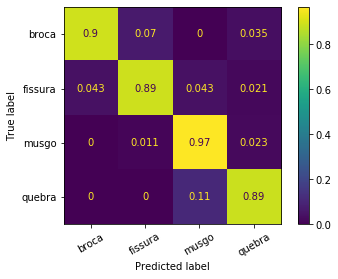

Rodada 1	-	Seed 3098
              precision    recall  f1-score   support

       broca       0.97      0.88      0.92        80
     fissura       0.90      0.97      0.93        93
       musgo       0.95      0.97      0.96        93
      quebra       0.96      0.95      0.95        92

    accuracy                           0.94       358
   macro avg       0.94      0.94      0.94       358
weighted avg       0.94      0.94      0.94       358



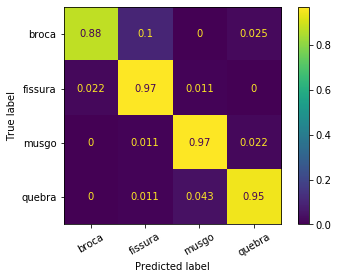

Rodada 2	-	Seed 3593
              precision    recall  f1-score   support

       broca       0.98      0.93      0.95       101
     fissura       0.91      0.97      0.94        86
       musgo       0.89      0.92      0.91        78
      quebra       0.96      0.92      0.94        93

    accuracy                           0.94       358
   macro avg       0.93      0.94      0.93       358
weighted avg       0.94      0.94      0.94       358



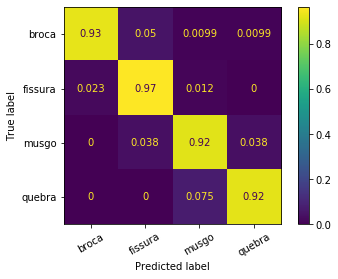

Rodada 3	-	Seed 1651
              precision    recall  f1-score   support

       broca       0.96      0.88      0.92        85
     fissura       0.90      0.96      0.92        90
       musgo       0.94      0.94      0.94        98
      quebra       0.94      0.95      0.95        85

    accuracy                           0.93       358
   macro avg       0.93      0.93      0.93       358
weighted avg       0.93      0.93      0.93       358



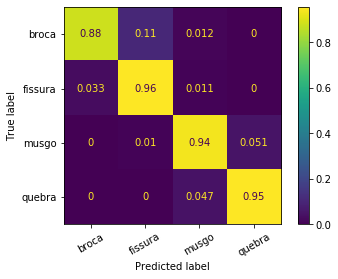

Rodada 4	-	Seed 4943
              precision    recall  f1-score   support

       broca       0.93      0.95      0.94        88
     fissura       0.97      0.91      0.94        98
       musgo       0.92      0.95      0.93        91
      quebra       0.93      0.95      0.94        81

    accuracy                           0.94       358
   macro avg       0.94      0.94      0.94       358
weighted avg       0.94      0.94      0.94       358



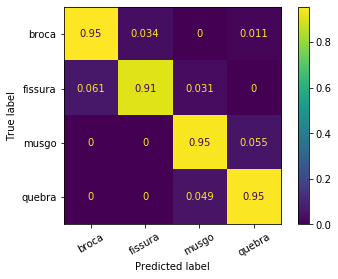

Rodada 5	-	Seed 6598
              precision    recall  f1-score   support

       broca       0.98      1.00      0.99        83
     fissura       0.99      0.98      0.99       102
       musgo       0.94      0.93      0.94        87
      quebra       0.94      0.94      0.94        86

    accuracy                           0.96       358
   macro avg       0.96      0.96      0.96       358
weighted avg       0.96      0.96      0.96       358



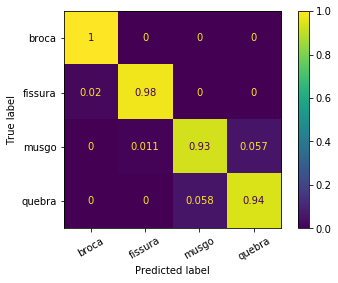

Rodada 6	-	Seed 6409
              precision    recall  f1-score   support

       broca       0.94      0.92      0.93        95
     fissura       0.92      0.93      0.93        90
       musgo       0.93      0.92      0.93        89
      quebra       0.91      0.93      0.92        84

    accuracy                           0.92       358
   macro avg       0.92      0.92      0.92       358
weighted avg       0.92      0.92      0.92       358



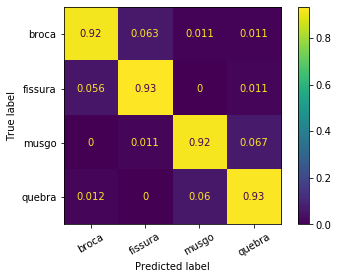

Rodada 7	-	Seed 4064
              precision    recall  f1-score   support

       broca       0.89      0.92      0.91        90
     fissura       0.90      0.88      0.89        90
       musgo       0.94      0.89      0.92        93
      quebra       0.90      0.94      0.92        85

    accuracy                           0.91       358
   macro avg       0.91      0.91      0.91       358
weighted avg       0.91      0.91      0.91       358



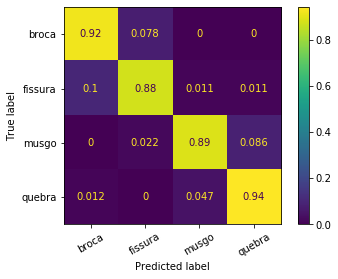

Rodada 8	-	Seed 6476
              precision    recall  f1-score   support

       broca       0.93      0.97      0.95        86
     fissura       0.95      0.93      0.94        97
       musgo       0.95      0.94      0.94        82
      quebra       0.97      0.97      0.97        93

    accuracy                           0.95       358
   macro avg       0.95      0.95      0.95       358
weighted avg       0.95      0.95      0.95       358



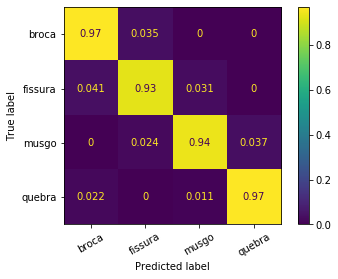

Rodada 9	-	Seed 4319
              precision    recall  f1-score   support

       broca       0.87      0.94      0.90        84
     fissura       0.89      0.89      0.89        93
       musgo       0.93      0.87      0.90        90
      quebra       0.92      0.91      0.92        91

    accuracy                           0.90       358
   macro avg       0.90      0.90      0.90       358
weighted avg       0.90      0.90      0.90       358



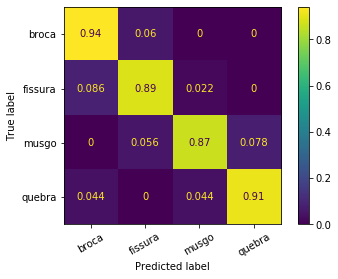

Rodada 10	-	Seed 1584
              precision    recall  f1-score   support

       broca       0.97      0.96      0.96        95
     fissura       0.93      0.98      0.95        82
       musgo       0.95      0.93      0.94        98
      quebra       0.93      0.92      0.92        83

    accuracy                           0.94       358
   macro avg       0.94      0.94      0.94       358
weighted avg       0.94      0.94      0.94       358



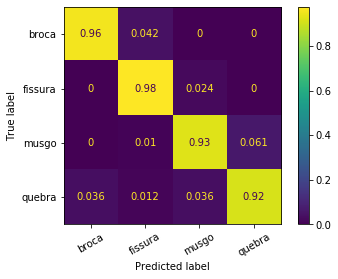

Rodada 11	-	Seed 4247
              precision    recall  f1-score   support

       broca       0.98      0.92      0.95        87
     fissura       0.91      0.97      0.94        88
       musgo       0.93      0.94      0.93        93
      quebra       0.94      0.93      0.94        90

    accuracy                           0.94       358
   macro avg       0.94      0.94      0.94       358
weighted avg       0.94      0.94      0.94       358



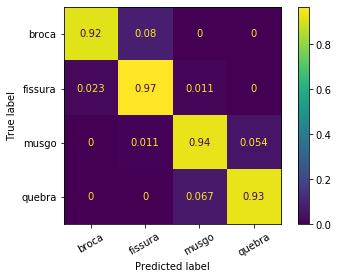

Rodada 12	-	Seed 5390
              precision    recall  f1-score   support

       broca       0.98      0.92      0.95        86
     fissura       0.92      0.94      0.93        88
       musgo       0.88      1.00      0.94        81
      quebra       0.99      0.91      0.95       103

    accuracy                           0.94       358
   macro avg       0.94      0.94      0.94       358
weighted avg       0.94      0.94      0.94       358



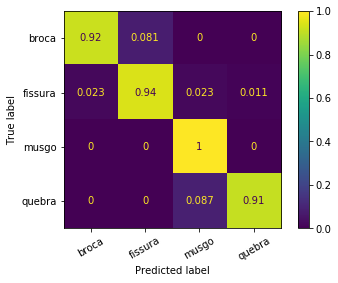

Rodada 13	-	Seed 694
              precision    recall  f1-score   support

       broca       0.97      0.92      0.94        98
     fissura       0.91      0.94      0.93        87
       musgo       0.93      0.95      0.94        88
      quebra       0.94      0.94      0.94        85

    accuracy                           0.94       358
   macro avg       0.94      0.94      0.94       358
weighted avg       0.94      0.94      0.94       358



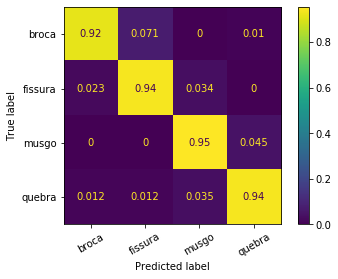

Rodada 14	-	Seed 1974
              precision    recall  f1-score   support

       broca       1.00      0.91      0.95        98
     fissura       0.90      0.99      0.94        81
       musgo       0.93      0.94      0.94        88
      quebra       0.95      0.95      0.95        91

    accuracy                           0.94       358
   macro avg       0.94      0.95      0.94       358
weighted avg       0.95      0.94      0.94       358



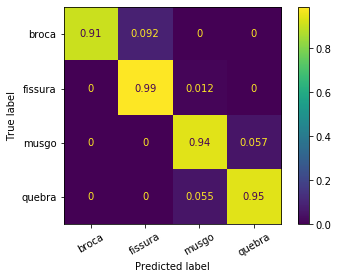

Rodada 15	-	Seed 5480
              precision    recall  f1-score   support

       broca       0.92      0.89      0.91        76
     fissura       0.89      0.93      0.91        91
       musgo       0.95      0.91      0.93        98
      quebra       0.93      0.95      0.94        93

    accuracy                           0.92       358
   macro avg       0.92      0.92      0.92       358
weighted avg       0.92      0.92      0.92       358



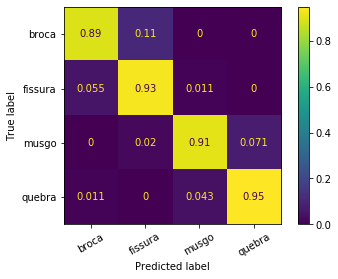

Rodada 16	-	Seed 5551
              precision    recall  f1-score   support

       broca       0.94      0.95      0.95        84
     fissura       0.95      0.93      0.94        88
       musgo       0.97      0.90      0.93        92
      quebra       0.92      0.99      0.95        94

    accuracy                           0.94       358
   macro avg       0.95      0.94      0.94       358
weighted avg       0.95      0.94      0.94       358



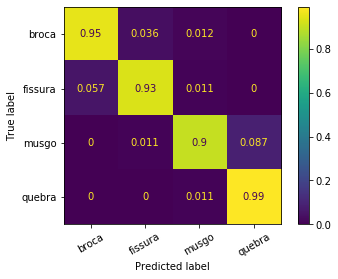

Rodada 17	-	Seed 2605
              precision    recall  f1-score   support

       broca       0.99      0.87      0.92        89
     fissura       0.77      0.96      0.85        78
       musgo       0.93      0.90      0.92        93
      quebra       0.97      0.91      0.94        98

    accuracy                           0.91       358
   macro avg       0.91      0.91      0.91       358
weighted avg       0.92      0.91      0.91       358



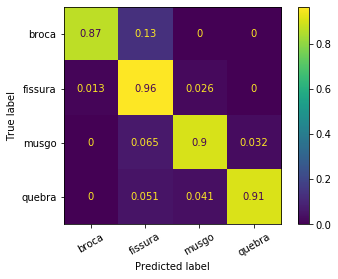

Rodada 18	-	Seed 6794
              precision    recall  f1-score   support

       broca       0.95      0.93      0.94        88
     fissura       0.94      0.94      0.94        87
       musgo       0.91      0.96      0.93        93
      quebra       0.94      0.91      0.93        90

    accuracy                           0.94       358
   macro avg       0.94      0.94      0.94       358
weighted avg       0.94      0.94      0.94       358



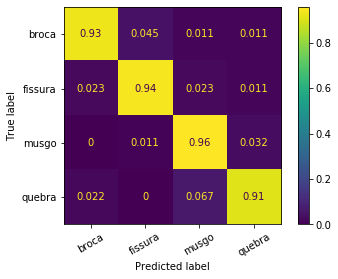

Rodada 19	-	Seed 4220
              precision    recall  f1-score   support

       broca       0.94      0.94      0.94       101
     fissura       0.95      0.88      0.91        90
       musgo       0.93      0.96      0.94        92
      quebra       0.91      0.96      0.94        75

    accuracy                           0.93       358
   macro avg       0.93      0.93      0.93       358
weighted avg       0.93      0.93      0.93       358



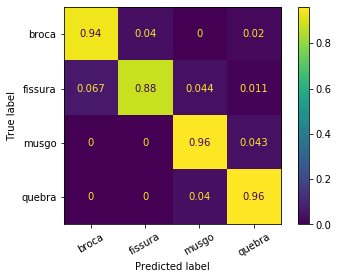

Rodada 20	-	Seed 7966
              precision    recall  f1-score   support

       broca       0.96      0.93      0.94        83
     fissura       0.94      0.95      0.94        92
       musgo       0.94      0.94      0.94       102
      quebra       0.92      0.94      0.93        81

    accuracy                           0.94       358
   macro avg       0.94      0.94      0.94       358
weighted avg       0.94      0.94      0.94       358



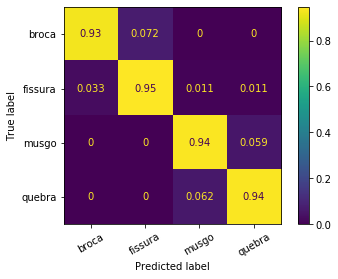

Rodada 21	-	Seed 5673
              precision    recall  f1-score   support

       broca       0.92      0.95      0.94        86
     fissura       0.94      0.89      0.91        82
       musgo       0.91      0.97      0.94        91
      quebra       0.98      0.93      0.95        99

    accuracy                           0.94       358
   macro avg       0.94      0.94      0.93       358
weighted avg       0.94      0.94      0.94       358



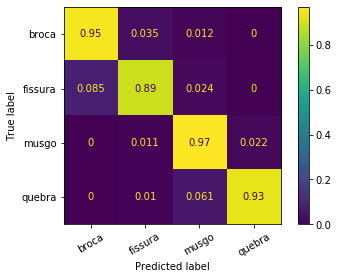

Rodada 22	-	Seed 4852
              precision    recall  f1-score   support

       broca       0.90      0.93      0.91        86
     fissura       0.93      0.89      0.91        97
       musgo       0.92      0.97      0.95        89
      quebra       0.95      0.93      0.94        86

    accuracy                           0.93       358
   macro avg       0.93      0.93      0.93       358
weighted avg       0.93      0.93      0.93       358



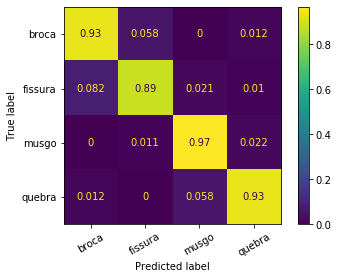

Rodada 23	-	Seed 5266
              precision    recall  f1-score   support

       broca       1.00      0.89      0.94        92
     fissura       0.90      0.99      0.94        88
       musgo       0.94      0.98      0.96        85
      quebra       0.98      0.96      0.97        93

    accuracy                           0.95       358
   macro avg       0.95      0.95      0.95       358
weighted avg       0.96      0.95      0.95       358



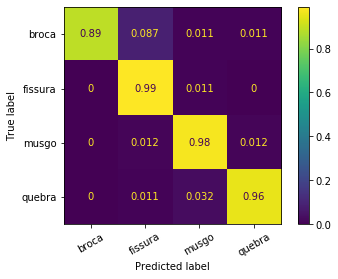

Rodada 24	-	Seed 4088
              precision    recall  f1-score   support

       broca       0.94      0.97      0.95        86
     fissura       0.95      0.93      0.94        96
       musgo       0.88      0.90      0.89        93
      quebra       0.91      0.88      0.90        83

    accuracy                           0.92       358
   macro avg       0.92      0.92      0.92       358
weighted avg       0.92      0.92      0.92       358



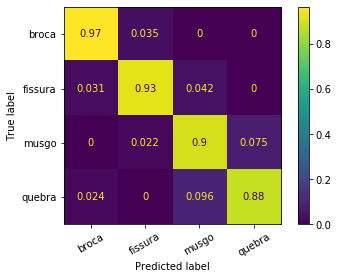

Rodada 25	-	Seed 2011
              precision    recall  f1-score   support

       broca       0.97      0.95      0.96        93
     fissura       0.95      0.97      0.96        91
       musgo       0.95      0.97      0.96        80
      quebra       0.98      0.96      0.97        94

    accuracy                           0.96       358
   macro avg       0.96      0.96      0.96       358
weighted avg       0.96      0.96      0.96       358



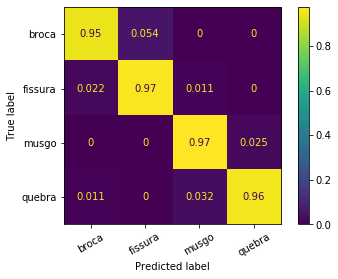

Rodada 26	-	Seed 1338
              precision    recall  f1-score   support

       broca       0.97      0.93      0.95        97
     fissura       0.94      0.98      0.96        95
       musgo       0.94      0.88      0.91        86
      quebra       0.87      0.93      0.90        80

    accuracy                           0.93       358
   macro avg       0.93      0.93      0.93       358
weighted avg       0.93      0.93      0.93       358



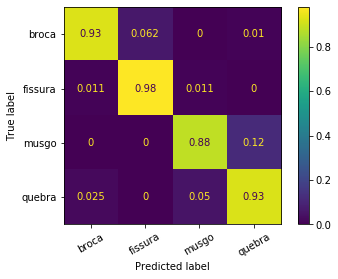

Rodada 27	-	Seed 268
              precision    recall  f1-score   support

       broca       0.90      0.95      0.92        81
     fissura       0.94      0.89      0.92        91
       musgo       0.98      0.91      0.94        98
      quebra       0.91      0.98      0.94        88

    accuracy                           0.93       358
   macro avg       0.93      0.93      0.93       358
weighted avg       0.93      0.93      0.93       358



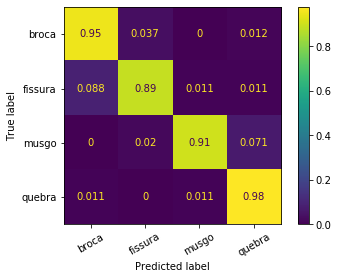

Rodada 28	-	Seed 3208
              precision    recall  f1-score   support

       broca       0.94      0.95      0.94        97
     fissura       0.92      0.95      0.93        83
       musgo       0.93      0.94      0.93        83
      quebra       0.97      0.92      0.94        95

    accuracy                           0.94       358
   macro avg       0.94      0.94      0.94       358
weighted avg       0.94      0.94      0.94       358



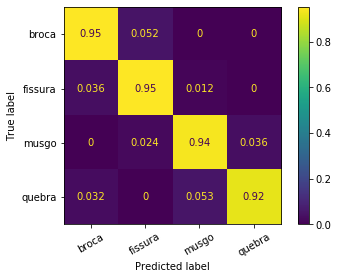

Rodada 29	-	Seed 4711
              precision    recall  f1-score   support

       broca       0.97      0.96      0.96        97
     fissura       0.94      0.95      0.95        88
       musgo       0.94      0.92      0.93        86
      quebra       0.93      0.95      0.94        87

    accuracy                           0.95       358
   macro avg       0.95      0.95      0.95       358
weighted avg       0.95      0.95      0.95       358



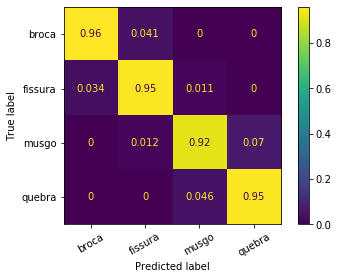

In [4]:
df = pd.read_csv('./csvs/lbp_toras.csv')
y = df.pop('target').values
X = df.values

# Gerando 30 sementes "aleatórias" dentro do intervalo [0, 8000)
seed_arr = np.random.randint(8000, size=30)

acc_e_f1_por_rodada = []
confu_matrices = []

for rodada, seed in enumerate(seed_arr):
  # separando dados
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

  clf = make_pipeline(StandardScaler(), SVC()).fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  
  # Adicionando resultados à respectiva lista
  acc_e_f1_por_rodada.append(
    [accuracy_score(y_test, y_pred)]
    + list(f1_score(y_test, y_pred, average=None)))

  confu_matrices.append(
    confusion_matrix(y_test, y_pred, normalize='true'))

  print(f'Rodada {rodada}\t-\tSeed {seed}')
  print(
    classification_report(
      y_true=y_test,
      y_pred=y_pred,
      target_names=TARGET_NAMES))

  plot_confusion_matrix(
    estimator=clf,
    X=X_test,
    y_true=y_test,
    display_labels=TARGET_NAMES,
    xticks_rotation=30,
    normalize='true')
  
  plt.show()

## Métricas do experimento

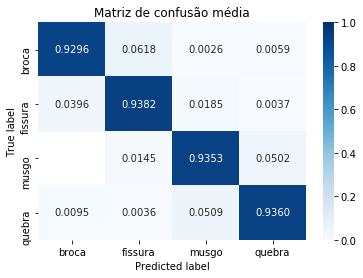

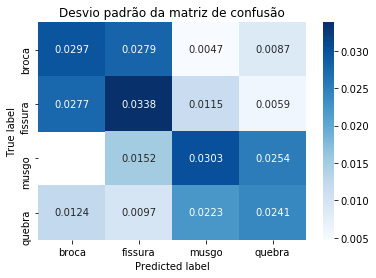

In [5]:
confusion_matrix_mean = np.mean(confu_matrices, axis=0)
confusion_matrix_std = np.std(confu_matrices, axis=0)

sns.heatmap(
    data=confusion_matrix_mean,
    cmap='Blues',
    vmin=0,
    vmax=1,
    annot=True,
    fmt='.4f',
    mask=confusion_matrix_mean == 0,
    xticklabels=TARGET_NAMES,
    yticklabels=TARGET_NAMES
    ).set(
        title='Matriz de confusão média',
        xlabel='Predicted label',
        ylabel='True label')

plt.show()

sns.heatmap(
    data=confusion_matrix_std,
    cmap='Blues',
    annot=True,
    fmt='.4f',
    mask=confusion_matrix_std == 0,
    xticklabels=TARGET_NAMES,
    yticklabels=TARGET_NAMES
    ).set(
        title='Desvio padrão da matriz de confusão',
        xlabel='Predicted label',
        ylabel='True label')

None

        Acurácia   f1-broca  f1-fissura   f1-musgo  f1-quebra
count  30.000000  30.000000   30.000000  30.000000  30.000000
mean    0.934544   0.938956    0.929426   0.931801   0.936724
std     0.014793   0.019180    0.024675   0.017198   0.018528
min     0.902235   0.902857    0.852273   0.888889   0.895706
25%     0.928073   0.922156    0.914297   0.926686   0.926623
50%     0.937151   0.943059    0.935877   0.935476   0.939891
75%     0.943436   0.948271    0.941017   0.941176   0.946790
max     0.963687   0.988095    0.985222   0.962963   0.967742


Acurácia,f1-broca,f1-fissura,f1-musgo,f1-quebra
0.910615,0.922156,0.908108,0.909091,0.903955
0.941341,0.921053,0.932642,0.957447,0.950820
0.935754,0.954315,0.937853,0.905660,0.939891
0.932961,0.920245,0.924731,0.938776,0.947368
0.938547,0.943820,0.936842,0.934783,0.939024
0.963687,0.988095,0.985222,0.936416,0.941860
0.924581,0.925532,0.928177,0.926554,0.917647
0.907821,0.907104,0.887640,0.917127,0.919540
0.949721,0.948571,0.937500,0.944785,0.967742
0.902235,0.902857,0.892473,0.896552,0.917127


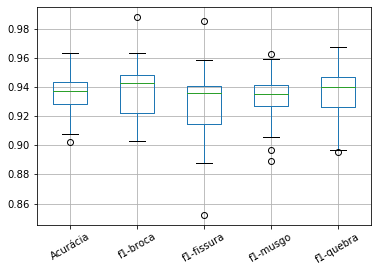

In [6]:
acc_df = pd.DataFrame(
  data=acc_e_f1_por_rodada,
  columns=['Acurácia'] + [f'f1-{name}' for name in TARGET_NAMES])

print(acc_df.describe())

acc_df.boxplot(rot=30)

acc_df.style.hide_index().background_gradient(cmap='Blues')